In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read data. All output of UR_enrichment_DEGs_as_background.m
lupus_SS_diseases = pd.read_table('/home/marsm05/Documents/CIA_UR_enrichment/UR_predictions_IMIDs_lupus_SS2.txt', sep = ',')

#file names:
datasets = pd.read_table('../data/UR_analysis/file_names.txt', header = None)
datasets = datasets.drop(21)
datasets.index = np.array(range(len(datasets)))
datasets = datasets[0]

#URs
URs = pd.read_table('../data/UR_analysis/URs.txt', header = None)[0]

#if disease is active or not
activity = pd.read_table('../data/UR_analysis/activity.txt', header = None)
activity = activity.drop(21)
activity.index = np.array(range(len(activity)))
activity = activity[0]

#Gene translation
translation = pd.read_table('../data/UR_analysis/gene_info.txt', sep = ',')

#If UR is predicted to be UR in a given dataset for SP1.6
Datasets_Inf = pd.read_table('../data/UR_analysis/Datasets_Inf2.txt', sep = ',', header = None)
Datasets_Inf.index = URs
Datasets_Inf.columns = datasets[activity == 'yes']
Datasets_Noninf = pd.read_table('../data/UR_analysis/Datasets_Noninf2.txt', sep = ',', header = None)
Datasets_Noninf.index = URs
Datasets_Noninf.columns = datasets[activity == 'no']

In [3]:
i = 0
logFC_list = list()
for dataset in Datasets_Inf.columns:
    print(dataset)
    if i in (6,12,15,16):
        data = pd.read_table('../data/UR_analysis/AllDEGfilesMovedToOneFolder/' + dataset)
        if i == 15:
            data = data.rename(columns = {'ORF': 'ENTREZ_GENE_ID'})
        trans = translation[translation['Symbol'].isin(Datasets_Inf.index)][['GeneID','Symbol']]
        data = trans.merge(data, left_on = 'GeneID', right_on ='ENTREZ_GENE_ID')[['Symbol', 'logFC']]
        data = data.rename(columns = {'Symbol': 'Gene.symbol'})
        data = data.rename(columns = {'logFC': dataset})
        data.index = data['Gene.symbol']
        data.pop('Gene.symbol')
        logFC_list.append(data)
    else:
        data = pd.read_table('../data/UR_analysis/AllDEGfilesMovedToOneFolder/' + dataset)
        if i in (7,20):
            data = data.rename(columns = {'ORF': 'Gene.symbol'})
        if i == 8:
            data = data.rename(columns = {'Gene.Symbol': 'Gene.symbol'})
        if i == 9:
            data = data.rename(columns = {'GENE_SYMBOL': 'Gene.symbol'})
        if i == 13:
            data = data.rename(columns = {'ID': 'Gene.symbol'})
        data = data[data['Gene.symbol'].isin(Datasets_Inf.index)].drop_duplicates('Gene.symbol')[['Gene.symbol', 'logFC']]
        data = data.rename(columns = {'logFC': dataset})
        data.index = data['Gene.symbol']
        data.pop('Gene.symbol')
        logFC_list.append(data)
    
    i = i+1
logFC_Inf = pd.concat(logFC_list, axis = 1)

GSE16161_Skin AD 9 vs contol 9.csv
GSE32924_Skin_AD 13 VS_control8.csv
GSE16879_colon_CD.csv
GSE179285_ascending descending colon_CD.csv
GSE16879_ileum_cd.csv
GSE179285_Terminal ileum_CD.csv
GSE81071_DLE_vs_control.csv
GSE148810_juvenile myositis_skin_1.csv
GSE32591_glomer_vs_contol_LN.csv
GSE181318_skin_psoriatic 3 vs control3.csv
GSE1919_rheumatoid arthritis _vs healthy (5 vs 5).csv
GSE55235_rheumatoid arthritis _vs healthy (10 vs 10).csv
GSE81071_SCLE_vs_control.csv
GSE176510_Sj”gren syndrome_keratocojunctivitis scicca.csv
GSE40568_sjogren_vs_controllabial salivary glands.csv
GSE81292_SSc_ILD_lung.csv
GSE95065_SSC_skin.csv
GSE11223_descending_colon.csv
GSE11223_sigmoid colon_UC.csv
GSE179285_sigmoid colon_UC.csv
GSE148810_childhood_onset_lupus_cSLE_skin.csv
GSE112943_kidney_lupus.csv
GSE112943_subacute cutaneous lupus.csv


In [4]:
i = 0
logFC_list = list()
for dataset in Datasets_Noninf.columns:
    print(dataset)

    data = pd.read_table('../data/UR_analysis/AllDEGfilesMovedToOneFolder/' + dataset)
    if i == 3:
        data = data.rename(columns = {'ORF': 'Gene.symbol'})

    if i == 8:
        data = data.rename(columns = {'GENE_NAME': 'Gene.symbol'})
    data = data[data['Gene.symbol'].isin(Datasets_Inf.index)].drop_duplicates('Gene.symbol')[['Gene.symbol', 'logFC']]
    data = data.rename(columns = {'logFC': dataset})
    data.index = data['Gene.symbol']
    data.pop('Gene.symbol')
    logFC_list.append(data)
    
    i = i+1
logFC_Noninf = pd.concat(logFC_list, axis = 1)

GSE32924_uninflamed 12 vs HC 8_AD.csv
GSE179285_unflamed ascending descending colon 72 vs control 12_CD.csv
GSE75214_inactive_vs_normal_CD_16_11_ileum.csv
GSE148810_Nonlesional skin 6 vs HC 8_JM.csv
GSE14905_psoriasis_non lesion skin 28 vs control 21.csv
GSE75214_inactive_vs_normal_23_11_UC_colon.csv
GSE11223_Uninflamed 66 vs HC 69_UC.csv
GSE179285_inactive 32 vs contol 31_UC.csv
GSE66413_Pancreatic lymph nodes 13_ T1D vs healthy 3.csv


In [5]:
z_scores_Inf = list()
i = 0
for dataset in Datasets_Inf.columns:
    if i != 12:
        a = pd.read_table('../data/UR_analysis/z_scores/ ' + dataset, sep = ',', index_col = 0)    
        a.columns = [dataset]
        z_scores_Inf.append(a)
    i = i+1
z_scores_Inf = pd.concat(z_scores_Inf, axis = 1)
        
    
z_scores_Noninf = list()
for dataset in Datasets_Noninf.columns:
    a = pd.read_table('../data/UR_analysis/z_scores/ ' + dataset, sep = ',', index_col = 0)    
    a.columns = [dataset]
    z_scores_Noninf.append(a)
z_scores_Noninf = pd.concat(z_scores_Noninf, axis = 1)

In [6]:
dataset_genes = list()
for dataset in lupus_SS_diseases.columns[8:16]:
    sig_URs = lupus_SS_diseases.sort_values(by = dataset, ascending = True)
    sig_URs = sig_URs[sig_URs[dataset] < 0.5]
    genes_SP = list()
    for SP in lupus_SS_diseases['SP'].unique():
        genes_SP.append(sig_URs.loc[sig_URs['SP'] == SP].sort_values(by = dataset)['UR'])
    genes_SP = pd.concat(genes_SP)
    dataset_genes.append(genes_SP.unique())

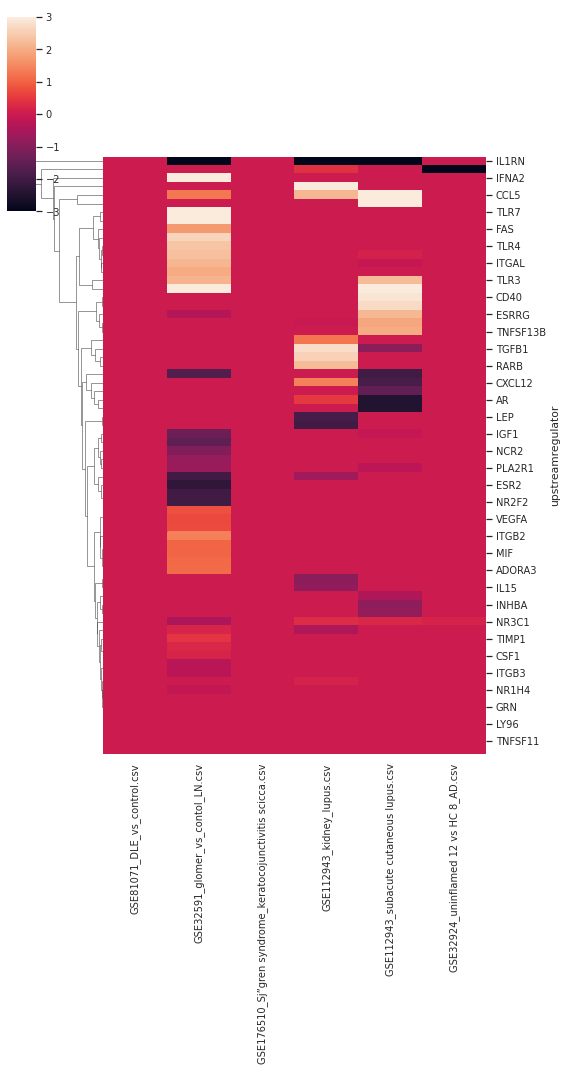

In [7]:
Datasets_Inf = z_scores_Inf[z_scores_Inf.index.isin(np.concatenate(dataset_genes))]
Datasets_Noninf = z_scores_Noninf[z_scores_Noninf.index.isin(np.concatenate(dataset_genes))]

summary = pd.concat((Datasets_Inf, Datasets_Noninf), axis = 1)
summary = summary.fillna(0)
summary = summary[summary.sum(axis = 1) != 0]
summary = summary.loc[summary.index.isin(np.concatenate(dataset_genes))]
summary = summary[summary.columns[[6,8,12,20,21,22]]]



sns.set(font_scale=0.9)
result = sns.clustermap(summary, vmin = -3, vmax = 3, col_cluster=False, figsize=(8, 15))
ax = result.ax_heatmap


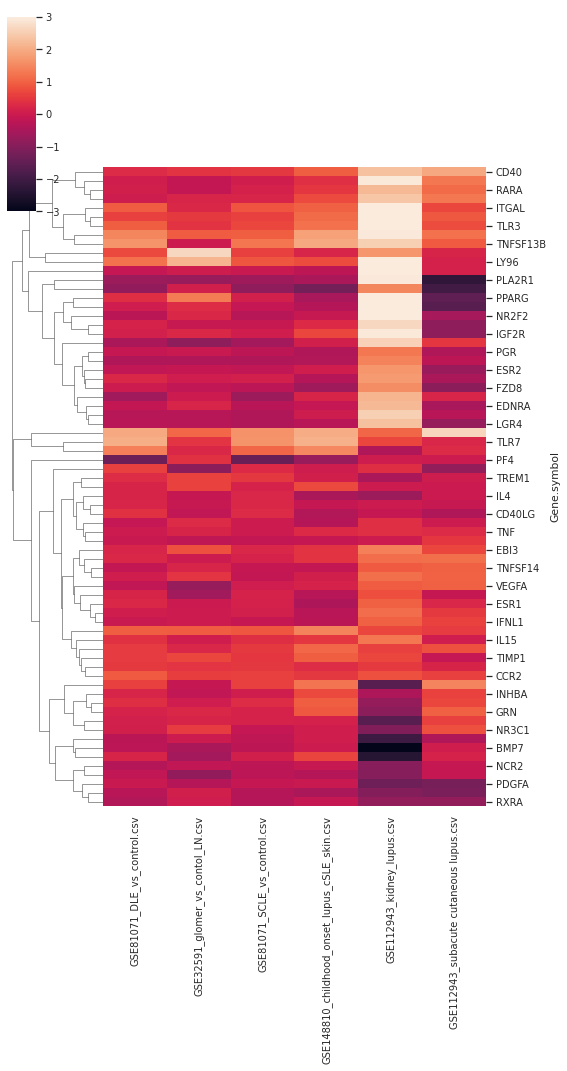

In [9]:
Datasets_Inf = logFC_Inf[logFC_Inf.index.isin(np.concatenate(dataset_genes))]
Datasets_Noninf = logFC_Noninf[logFC_Noninf.index.isin(np.concatenate(dataset_genes))]

summary = pd.concat((Datasets_Inf, Datasets_Noninf), axis = 1)
summary = summary.fillna(0)
summary = summary[summary.sum(axis = 1) != 0]
summary = summary.loc[summary.index.isin(np.concatenate(dataset_genes))]
summary = summary[summary.columns[[6,8,12,20,21,22]]]



sns.set(font_scale=0.9)
result = sns.clustermap(summary, vmin = -3, vmax = 3, col_cluster=False, figsize=(8, 15))
ax = result.ax_heatmap
